#Análisis enfocado en datos de producción  Agrícola en colombia.


# 1. Planteamiento del Problema

En el sector agrícola, la eficiencia en la producción y la distribución de los recursos es fundamental para garantizar la seguridad alimentaria y el desarrollo económico de las regiones. Para comprender mejor la dinámica de la agricultura en un país o región específica, es crucial analizar y visualizar datos relacionados con la producción agrícola, incluyendo variables como el área sembrada, área cosechada, producción, rendimiento y características geográficas.

Objetivo:
El objetivo principal de este estudio es analizar y visualizar datos agrícolas para identificar patrones, tendencias y disparidades en la producción agrícola a nivel municipal y departamental. Esto incluye identificar los municipios y departamentos más productivos, así como aquellos con menor producción agrícola. Además, se busca comprender la distribución geográfica de la producción agrícola en el país. Adicionalmente, se aplicarán técnicas de regresión lineal y clasificación para predecir la producción agrícola y clasificar los cultivos en función de su desempeño y características.

https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-Municipales-EVA/2pnw-mmge/data_preview

El proyecto quedará alojado en el siguiente repositorio de GitHub, en la carpeta "Proyecto Final"

https://github.com/ReneCordoba/Talento_Tech


Estudiante: Rene Ruano Cordoba.

# 2.Variables del Dataset.

**cod_dep**: Código numérico del departamento.

**depto**: Nombre del departamento.

**cod_mpio**: Código numérico del municipio.

**nombre_mpio**: Nombre del municipio.

**grupo_cultivo**: Grupo al que pertenece el cultivo.

**subgrupo_cultivo**: Subgrupo al que pertenece el cultivo.

**cultivo**: Nombre del cultivo.

**desagregacion_regional**: Descripción regional del cultivo.

**anio**: Año de la data.

**periodo**: Periodo específico dentro del año.

**area_sembrada_ha**: Área sembrada en hectáreas.

**area_cosechada_ha**: Área cosechada en hectáreas.

**produccion_ton**: Producción en toneladas.

**rendimiento_ton_ha**: Rendimiento en toneladas por hectárea.

**estado_fisico_produccion**: Estado físico de la producción.

**nombre_cientifico**: Nombre científico del cultivo.


# 3. Importar Librerias

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from ipywidgets import interact, VBox, HTML, Dropdown, Layout, HBox, Checkbox, interactive_output
from shapely.geometry import mapping, Polygon, MultiPolygon
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [7]:
# Desactivar las alertas
warnings.filterwarnings('ignore')

In [8]:
#Montar drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4. Importar Datos.
[Evaluacionesagricolas](https://drive.google.com/file/d/1MyXSUqfFwNrrxJw7Ha5iPsEz51XoDsIb/view?usp=drive_link) y
[municipios](https://drive.google.com/file/d/1-6aH6-P25awmKEuYya1rkM520nelTKkr/view?usp=drive_link)

In [9]:
# Importar el datasets
df_agro_col = pd.read_csv('/content/drive/MyDrive/Tech/Evaluaciones_Agropecuarias_Municipales_EVA_20240521.csv')
# Carga el archivo GeoJSON
mpio = gpd.read_file('/content/drive/MyDrive/datasets/municipios.geojson')


# 5. Analisis Exploratorio de Datos


In [10]:
# Renombrar las columnas del DataFrame df_agro_col
nuevos_nombres = {
    'CÓD. \nDEP.': 'cod_dep',
    'DEPARTAMENTO': 'depto',
    'CÓD. MUN.': 'cod_mpio',
    'MUNICIPIO': 'nombre_mpio',
    'GRUPO \nDE CULTIVO': 'grupo_cultivo',
    'SUBGRUPO \nDE CULTIVO': 'subgrupo_cultivo',
    'CULTIVO': 'cultivo',
    'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'desagregacion_regional',
    'AÑO': 'anio',
    'PERIODO': 'periodo',
    'Área Sembrada\n(ha)': 'area_sembrada_ha',
    'Área Cosechada\n(ha)': 'area_cosechada_ha',
    'Producción\n(t)': 'produccion_ton',
    'Rendimiento\n(t/ha)': 'rendimiento_ton_ha',
    'ESTADO FISICO PRODUCCION': 'estado_fisico_produccion',
    'NOMBRE \nCIENTIFICO': 'nombre_cientifico',
    'CICLO DE CULTIVO': 'ciclo_cultivo'
}

df_agro_col = df_agro_col.rename(columns=nuevos_nombres)

In [11]:
#Visualizar DataFrame df_agro_col
df_agro_col

,cod_dep,depto,cod_mpio,nombre_mpio,grupo_cultivo,subgrupo_cultivo,cultivo,desagregacion_regional,anio,periodo,area_sembrada_ha,area_cosechada_ha,produccion_ton,rendimiento_ton_ha,estado_fisico_produccion,nombre_cientifico,ciclo_cultivo
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [12]:
# Eliminar la columna "NOMBRE CIENTIFICO" df_agro_col
df_agro_col = df_agro_col.drop(columns=['nombre_cientifico'])

In [13]:
# Visualizar datos en blanco del DataFrame df_agro_col

datos_blanco = pd.DataFrame({
    'Registros en Blanco' : df_agro_col.isna().sum(),
    '% Registros en Blanco' : df_agro_col.isna().sum()/len(df_agro_col)
})

datos_blanco

,Registros en Blanco,% Registros en Blanco
cod_dep,0,0.000000
depto,0,0.000000
cod_mpio,0,0.000000
nombre_mpio,1,0.000005
grupo_cultivo,0,0.000000
subgrupo_cultivo,0,0.000000
cultivo,0,0.000000
desagregacion_regional,0,0.000000
anio,0,0.000000
periodo,0,0.000000


In [14]:
# Filtrar los cultivos con área sembrada menor que 1 hectárea del df_agro_col
cultivos_area_menor_1 = df_agro_col[df_agro_col['area_sembrada_ha'] < 1].reset_index()
# Mostrar el resultado
print("Cultivos con área sembrada menor que 1 hectárea:")
cultivos_area_menor_1

Cultivos con área sembrada menor que 1 hectárea:


,index,cod_dep,depto,cod_mpio,nombre_mpio,grupo_cultivo,subgrupo_cultivo,cultivo,desagregacion_regional,anio,periodo,area_sembrada_ha,area_cosechada_ha,produccion_ton,rendimiento_ton_ha,estado_fisico_produccion,ciclo_cultivo
0,29,25,CUNDINAMARCA,25491,NOCAIMA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2009,2009A,0,0,0,0.32,FRUTO FRESCO,TRANSITORIO
1,36,25,CUNDINAMARCA,25491,NOCAIMA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2009,2009B,0,0,0,0.32,FRUTO FRESCO,TRANSITORIO
2,47,15,BOYACA,15491,NOBSA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2010,2010B,0,0,0,0.28,FRUTO FRESCO,TRANSITORIO
3,61,15,BOYACA,15500,OICATA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2011,2011B,0,0,0,0.28,FRUTO FRESCO,TRANSITORIO
4,117,76,VALLE DEL CAUCA,76890,YOTOCO,HORTALIZAS,ACELGA,ACELGA,ACELGA,2014,2014A,0,0,2,5.00,FRUTO FRESCO,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,204758,76,VALLE DEL CAUCA,76054,ARGELIA,HORTALIZAS,ZANAHORIA,ZANAHORIA,ZANAHORIA,2011,2011A,0,0,1,3.33,HORTALIZA FRESCA,TRANSITORIO
717,204780,17,CALDAS,17442,MARMATO,HORTALIZAS,ZANAHORIA,ZANAHORIA,ZANAHORIA,2011,2011B,0,0,6,15.00,HORTALIZA FRESCA,TRANSITORIO
718,204850,17,CALDAS,17442,MARMATO,HORTALIZAS,ZANAHORIA,ZANAHORIA,ZANAHORIA,2012,2012A,0,0,2,15.00,HORTALIZA FRESCA,TRANSITORIO
719,204913,17,CALDAS,17442,MARMATO,HORTALIZAS,ZANAHORIA,ZANAHORIA,ZANAHORIA,2012,2012B,0,0,2,15.00,HORTALIZA FRESCA,TRANSITORIO


In [15]:
# 1 eliminacion  de celdas vacias df_agro_col
df_agro_col.dropna(inplace= True)
# 2 Eliminar las filas donde area_sembrada_ha es menor que 1 del df_agro_col
df_agro_col = df_agro_col[df_agro_col['area_sembrada_ha'] >= 1]
#Visualizacion info DataFrame df_agro_col
df_agro_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201936 entries, 0 to 206067
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cod_dep                   201936 non-null  int64  
 1   depto                     201936 non-null  object 
 2   cod_mpio                  201936 non-null  int64  
 3   nombre_mpio               201936 non-null  object 
 4   grupo_cultivo             201936 non-null  object 
 5   subgrupo_cultivo          201936 non-null  object 
 6   cultivo                   201936 non-null  object 
 7   desagregacion_regional    201936 non-null  object 
 8   anio                      201936 non-null  int64  
 9   periodo                   201936 non-null  object 
 10  area_sembrada_ha          201936 non-null  int64  
 11  area_cosechada_ha         201936 non-null  int64  
 12  produccion_ton            201936 non-null  int64  
 13  rendimiento_ton_ha        201936 non-null  float6

In [16]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_agro_col
var_categ =df_agro_col[['depto', 'nombre_mpio', 'grupo_cultivo', 'subgrupo_cultivo', 'cultivo', 'desagregacion_regional', 'periodo', 'estado_fisico_produccion', 'ciclo_cultivo']]
unique_counts_var_categ = var_categ.nunique()
unique_values_var_categ = var_categ.apply(lambda x: x.unique())
pd.DataFrame({'frecuencia': unique_counts_var_categ, 'valores unicos': unique_values_var_categ})

,frecuencia,valores unicos
depto,32,"[BOYACA, CUNDINAMARCA, NORTE DE SANTANDER, SAN..."
nombre_mpio,1018,"[BUSBANZA, SOACHA, COTA, LOS PATIOS, PAMPLONA,..."
grupo_cultivo,13,"[HORTALIZAS, PLANTAS AROMATICAS, CONDIMENTARIA..."
subgrupo_cultivo,120,"[ACELGA, PLANTAS MEDICINALES, MALANGA, ACHIRA,..."
cultivo,218,"[ACELGA, ACHICORIA, MALANGA, ACHIRA, ACHIOTE, ..."
desagregacion_regional,266,"[ACELGA, ACHICORIA, ACHIN, ACHIRA, ACHIOTE (BI..."
periodo,36,"[2006B, 2007A, 2007B, 2008A, 2008B, 2009A, 200..."
estado_fisico_produccion,23,"[FRUTO FRESCO, HOJA FRESCA, TUBERCULO FRESCO, ..."
ciclo_cultivo,3,"[TRANSITORIO, ANUAL, PERMANENTE]"


In [17]:
#  resumen estadístico de las variables categóricas del dataframe df_agro_col
descripcion_categoricas = df_agro_col.describe(include='object')
descripcion_categoricas

,depto,nombre_mpio,grupo_cultivo,subgrupo_cultivo,cultivo,desagregacion_regional,periodo,estado_fisico_produccion,ciclo_cultivo
count,201936,201936,201936,201936,201936,201936,201936,201936,201936
unique,32,1018,13,120,218,266,36,23,3
top,BOYACA,BOLIVAR,FRUTALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2018,FRUTO FRESCO,TRANSITORIO
freq,20347,996,48221,24903,24903,20016,8759,57624,108175


In [18]:
# Visualizar las descripcion estadistica de las variables numericas de df_agro_col

var_num_df_agro_col = df_agro_col.drop(var_categ.columns, axis = 1)
var_num_df_agro_col.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
cod_dep,201936.0,40.3,25.2,5.0,17.0,41.0,68.0,99.0
cod_mpio,201936.0,40757.4,25197.4,5001.0,17541.0,41357.0,68001.0,99773.0
anio,201936.0,2012.5,3.5,2006.0,2009.0,2013.0,2015.0,2018.0
area_sembrada_ha,201936.0,295.6,1163.4,1.0,10.0,37.0,157.0,47403.0
area_cosechada_ha,201936.0,254.5,989.7,0.0,8.0,30.0,134.0,38600.0
produccion_ton,201936.0,2847.8,45572.2,0.0,36.0,150.0,675.0,4546116.0
rendimiento_ton_ha,201936.0,9.2,14.7,0.0,1.5,5.0,11.2,246.0


__Comentarios:__

- El DataFrame df_agro_col posee 201936 y el DataFrame mpio contines los registros de las geometrias de los municipios de colombia.
- El DataFrame df_agro_col posee rgistros vacios o
 nulos en las siguientes __columnas:__

 nombre_mpio 1.

 rendimiento_ton_ha 3433.

- El DataFrame df_agro_col se le elimino la columna nombre_cientifico, las filas donde habia valores vacios y ademas las filas donde la producion_ton_ha fuera < a 1.

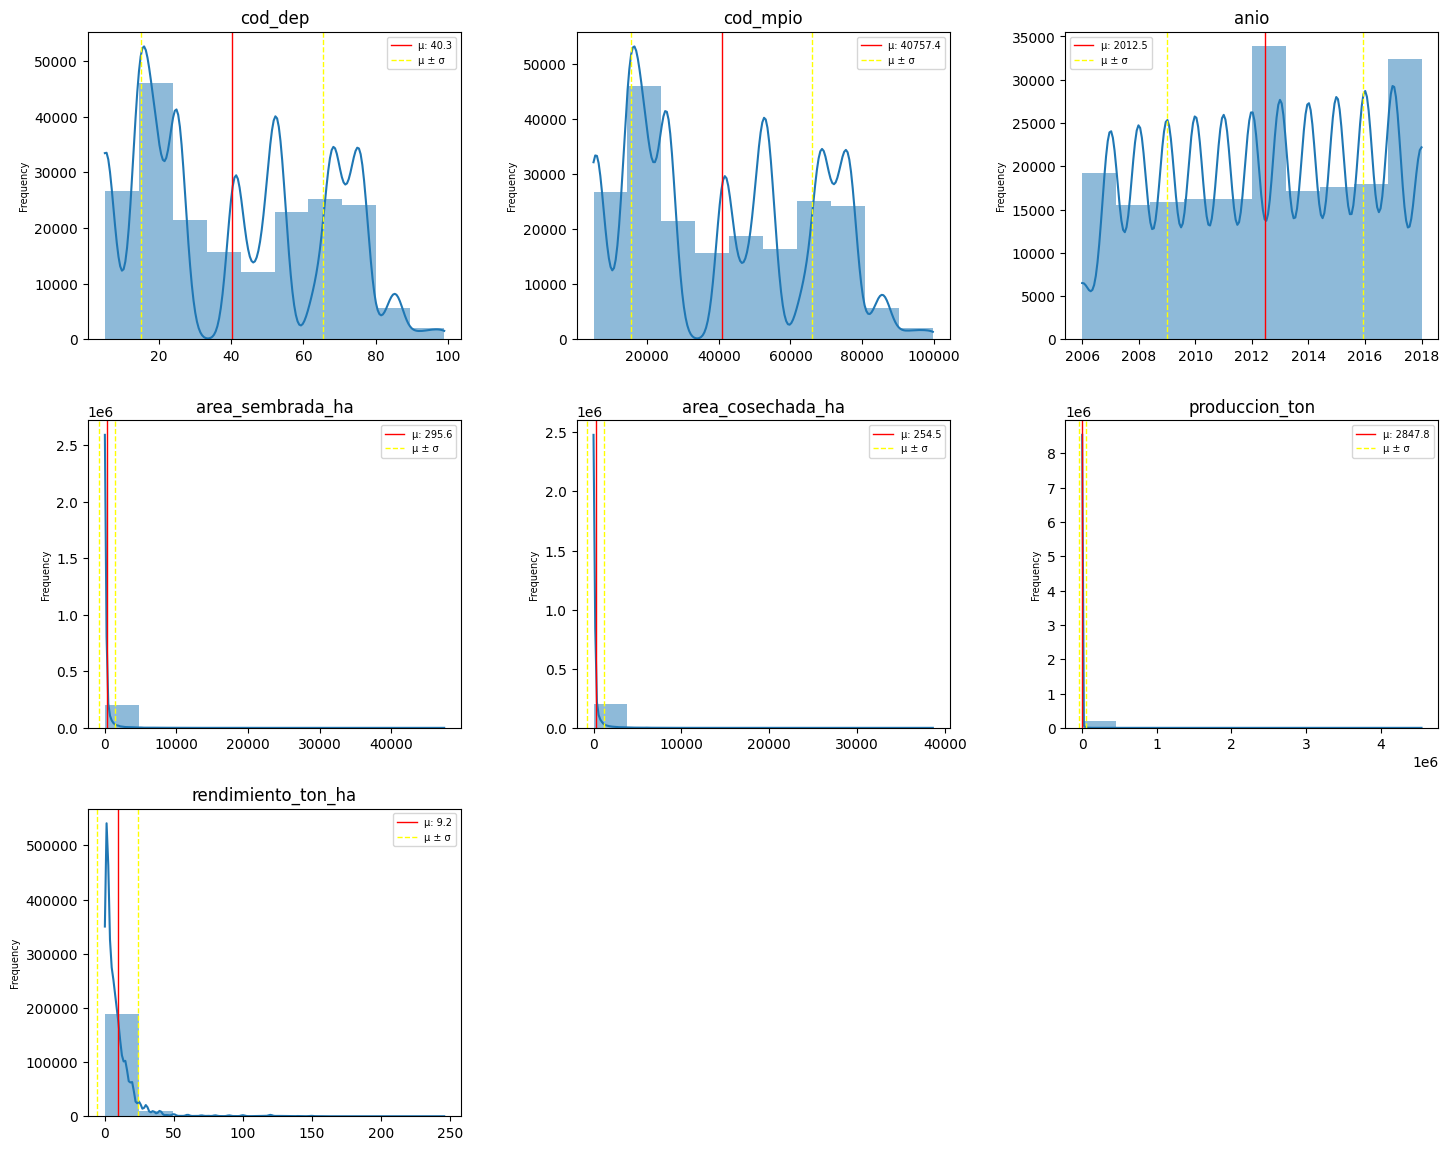

In [19]:
# Visualizar la distibucion de los datos de las variables numericas

columns = var_num_df_agro_col.columns.tolist()
num_variables = len(columns)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, variable in enumerate(columns):
    row = i // 3
    col = i % 3

    sns.histplot(var_num_df_agro_col[variable], bins=10, edgecolor=None, kde=True, ax=axes[row, col])

    mean_value = var_num_df_agro_col[variable].mean()
    std_dev = var_num_df_agro_col[variable].std()

    axes[row, col].axvline(mean_value, color='red', linewidth=1, label=f'µ: {mean_value:.1f}')
    axes[row, col].axvline(mean_value + std_dev, color='yellow', linestyle='--', linewidth=1, label=f'µ ± σ')
    axes[row, col].axvline(mean_value - std_dev, color='yellow', linestyle='--', linewidth=1)

    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency', fontsize=7)
    axes[row, col].set_title(variable)
    axes[row, col].legend(loc='best', fontsize=7)

# Ocultar los ejes de los subplots vacíos
for ax in axes.flat[num_variables:]:
    ax.axis('off')

plt.tight_layout(pad=2.5)
plt.show()

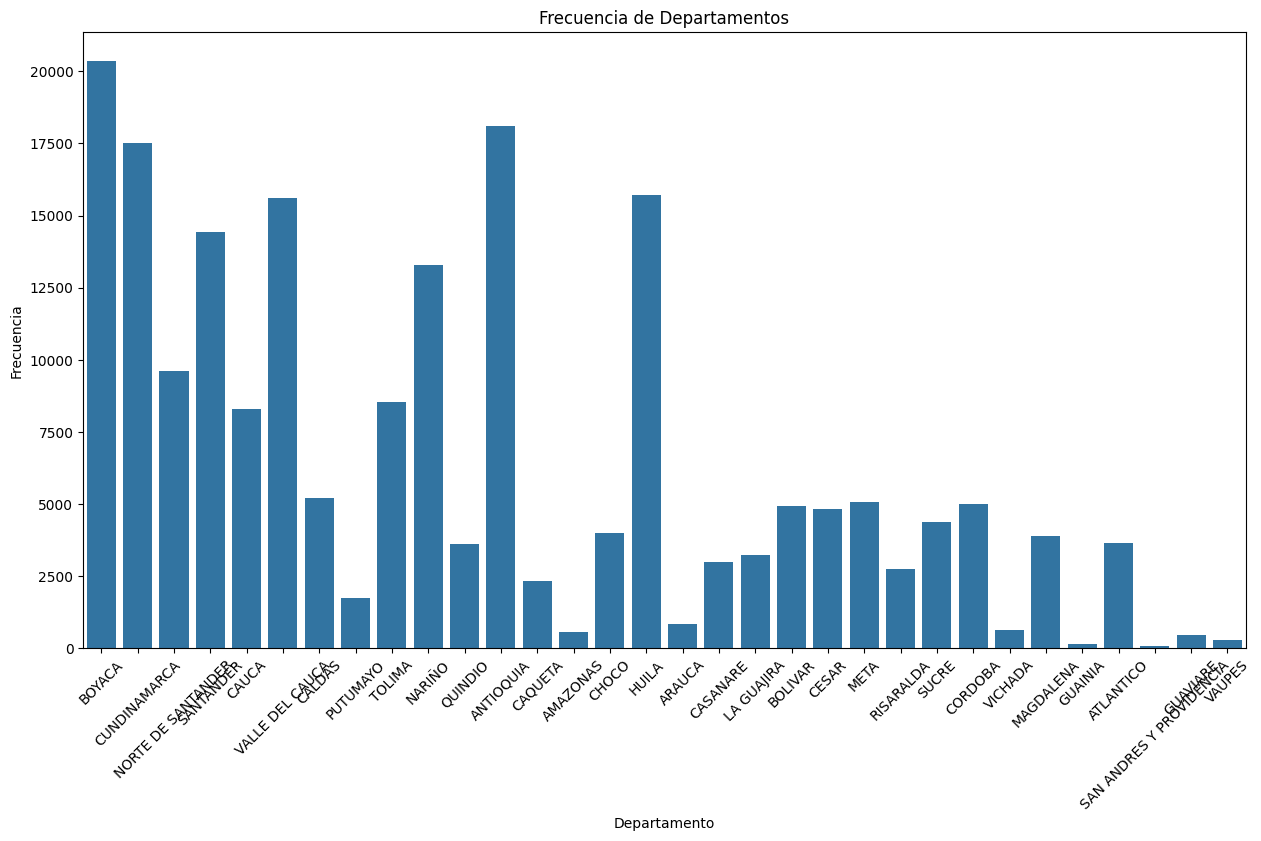

In [20]:
# Gráfico de barras variables categoricas
plt.figure(figsize=(15, 8))
sns.countplot(x='depto', data=df_agro_col)
plt.xticks(rotation=45)
plt.title('Frecuencia de Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.show()


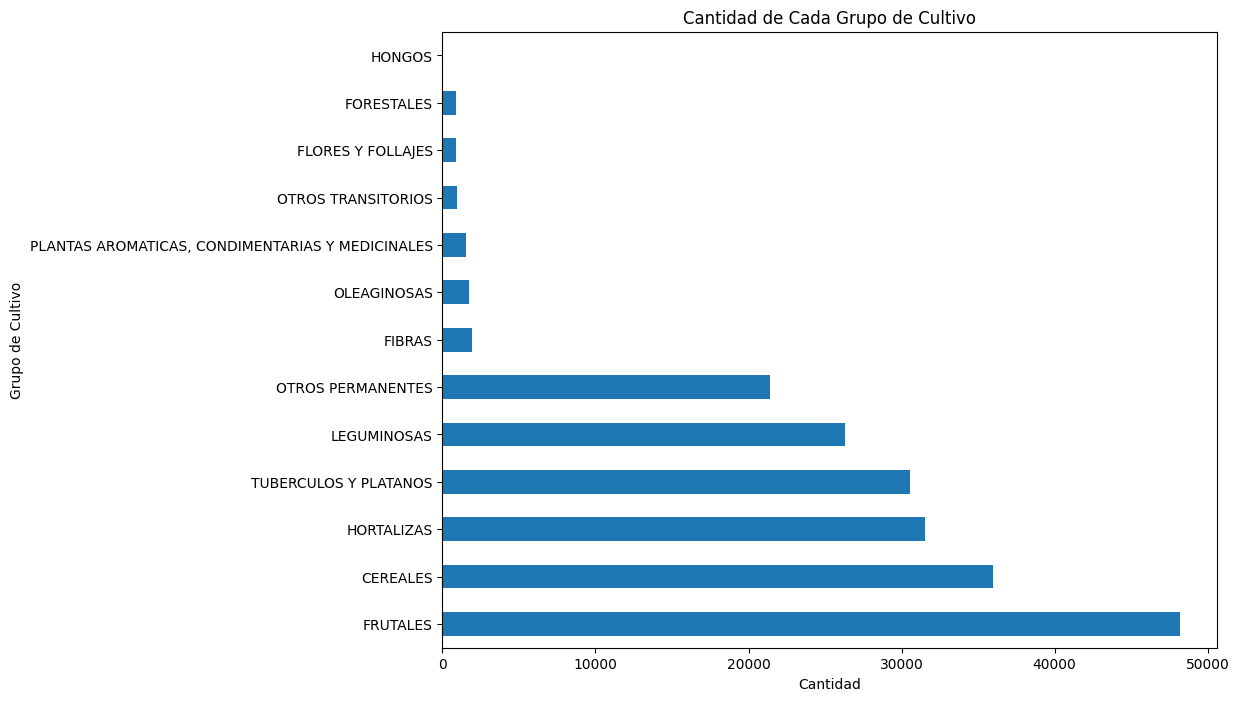

In [21]:
# Gráfico de barras variable categorica grupo_cultivo
plt.figure(figsize=(10, 8))
df_agro_col['grupo_cultivo'].value_counts().plot(kind='barh')
plt.title('Cantidad de Cada Grupo de Cultivo')
plt.xlabel('Cantidad')
plt.ylabel('Grupo de Cultivo')
plt.show()


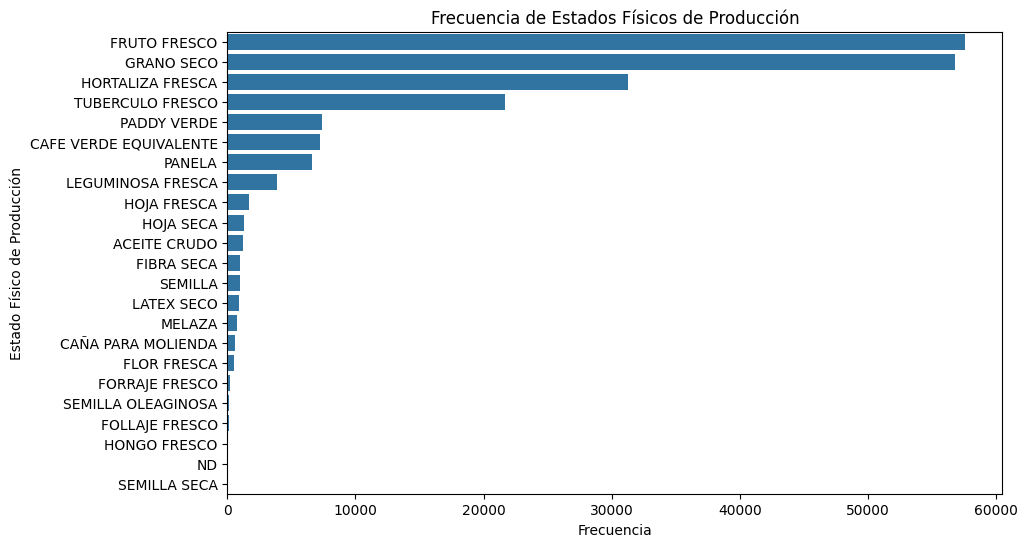

In [22]:
# Gráfico de conteo ordenado
plt.figure(figsize=(10, 6))
sns.countplot(y='estado_fisico_produccion', data=df_agro_col, order=df_agro_col['estado_fisico_produccion'].value_counts().index)
plt.title('Frecuencia de Estados Físicos de Producción')
plt.xlabel('Frecuencia')
plt.ylabel('Estado Físico de Producción')
plt.show()


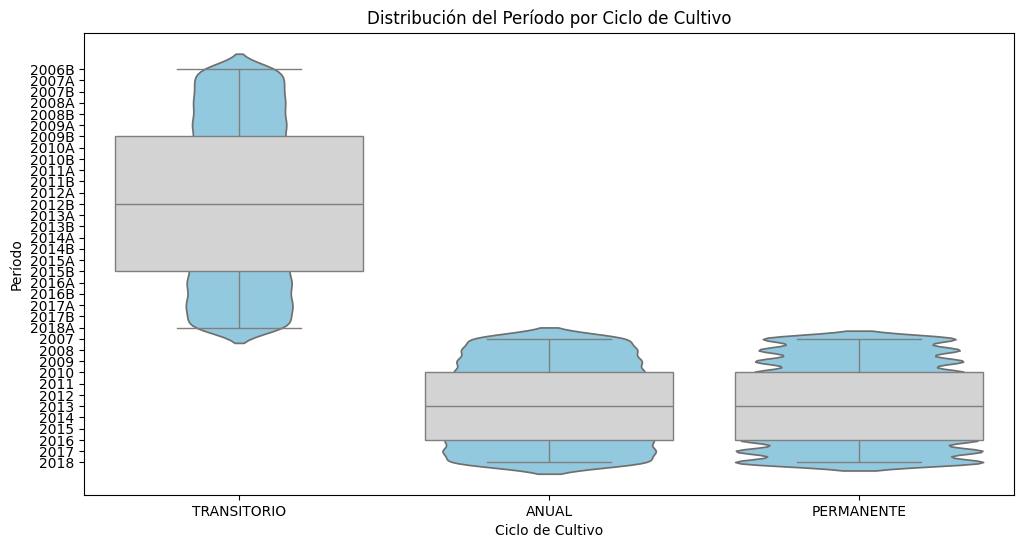

In [23]:
# Diagrama de caja y violín juntos
plt.figure(figsize=(12, 6))

# Diagrama de caja
sns.boxplot(x='ciclo_cultivo', y='periodo', data=df_agro_col, color='lightgray')

# Diagrama de violín
sns.violinplot(x='ciclo_cultivo', y='periodo', data=df_agro_col, inner=None, color='skyblue')

plt.title('Distribución del Período por Ciclo de Cultivo')
plt.xlabel('Ciclo de Cultivo')
plt.ylabel('Período')
plt.show()


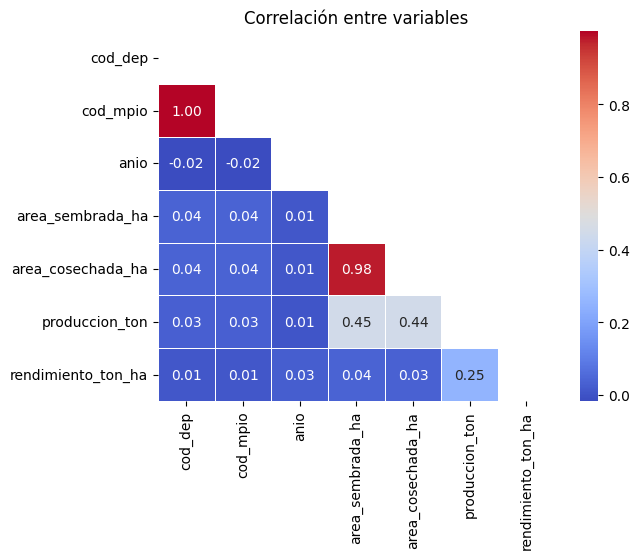

In [24]:
# Crear un heatmap para visualizar la correlacion entre variables del DataFrame df_agro_col

# Seleccionar solo columnas numéricas
df_numeric = df_agro_col.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las columnas numéricas
matriz = df_numeric.corr(method='pearson')

# Crear la máscara para el heatmap
mask = np.triu(np.ones_like(matriz, dtype=bool))

# Visualizar el heatmap de correlación
sns.heatmap(matriz, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre variables')
plt.show()


# 6.Comparacion de productividad

In [25]:
# Agrupa por 'depto' y suma la columna 'produccion_ton'
produccion_por_departamento = df_agro_col.groupby('depto')['produccion_ton'].sum()

# Ordena los departamentos por la producción total en orden descendente
departamentos_ordenados = produccion_por_departamento.sort_values(ascending=False)

# Selecciona los 5 primeros departamentos (más productivos)
top_5_departamentos = departamentos_ordenados.head(5).reset_index()

# Selecciona los 5 últimos departamentos (menos productivos)
bottom_5_departamentos = departamentos_ordenados.tail(5).reset_index()

# Renombrar las columnas
top_5_departamentos.columns = ['DEPARTAMENTO', 'TONELADAS']
bottom_5_departamentos.columns = ['DEPARTAMENTO', 'TONELADAS']

# Concatenar los DataFrames horizontalmente para la tabla
result_df = pd.concat([top_5_departamentos, bottom_5_departamentos], axis=1)
print("Comparación de los 5 departamentos más productivos y menos productivos:")
result_df




Comparación de los 5 departamentos más productivos y menos productivos:


,DEPARTAMENTO,TONELADAS,DEPARTAMENTO,TONELADAS
0,VALLE DEL CAUCA,231897843,VICHADA,750016
1,CAUCA,53298730,GUAINIA,157961
2,ANTIOQUIA,36824041,VAUPES,108494
3,CUNDINAMARCA,29967643,AMAZONAS,108357
4,META,28583914,SAN ANDRES Y PROVIDENCIA,1191


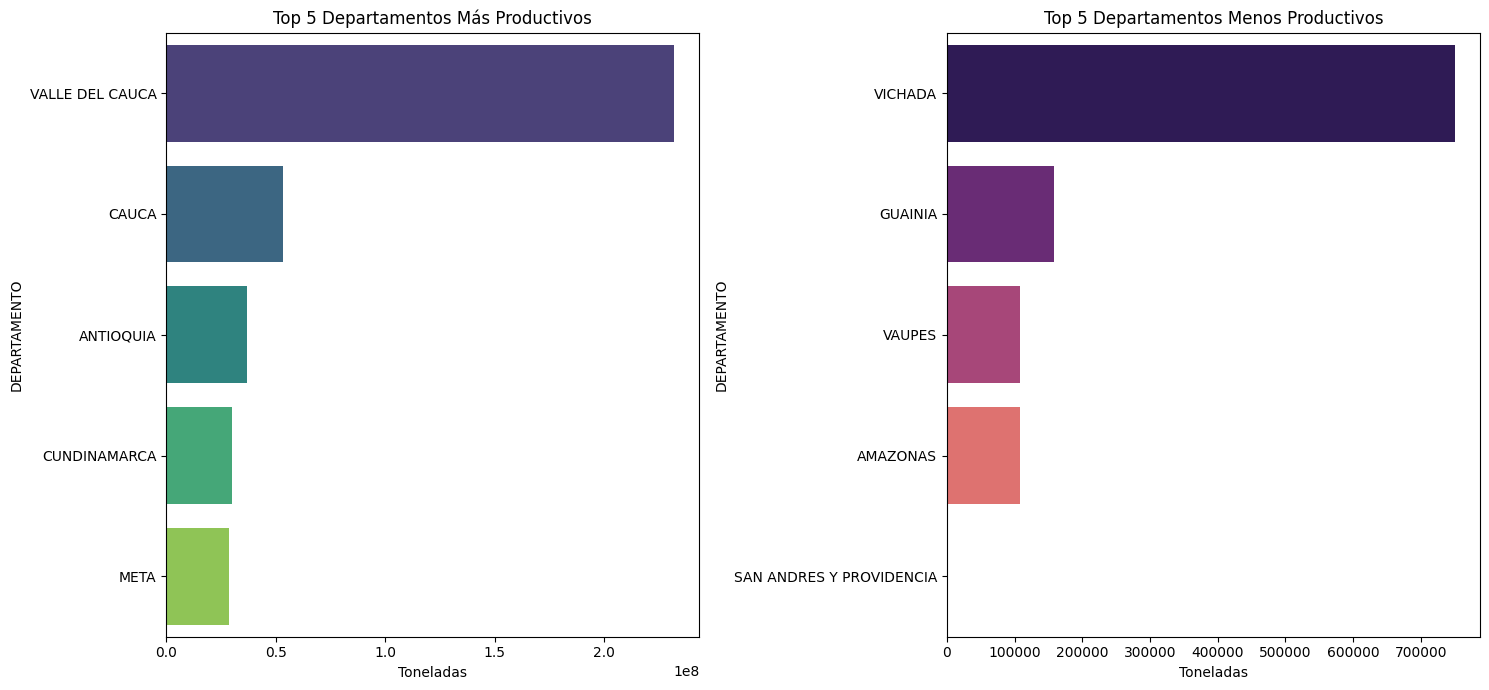

In [26]:
# Crear gráficos usando seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Gráfico para los 5 departamentos más productivos
sns.barplot(ax=axes[0], x='TONELADAS', y='DEPARTAMENTO', data=top_5_departamentos, palette='viridis')
axes[0].set_title('Top 5 Departamentos Más Productivos')
axes[0].set_xlabel('Toneladas')

# Gráfico para los 5 departamentos menos productivos
sns.barplot(ax=axes[1], x='TONELADAS', y='DEPARTAMENTO', data=bottom_5_departamentos, palette='magma')
axes[1].set_title('Top 5 Departamentos Menos Productivos')
axes[1].set_xlabel('Toneladas')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [27]:

# Agrupa por 'anio' y 'cultivo' y suma las columnas 'area_sembrada_ha' y 'produccion_ton'
area_y_produccion_por_cultivo_anio = df_agro_col.groupby(['anio', 'cultivo'])[['area_sembrada_ha', 'produccion_ton']].sum().reset_index()

# Inicializar listas para almacenar resultados
most_cultivated_list = []
least_cultivated_list = []

# Identificar el cultivo más y menos cultivado por año
for year in area_y_produccion_por_cultivo_anio['anio'].unique():
    yearly_data = area_y_produccion_por_cultivo_anio[area_y_produccion_por_cultivo_anio['anio'] == year]
    most_cultivated = yearly_data.loc[yearly_data['area_sembrada_ha'].idxmax()]
    least_cultivated = yearly_data.loc[yearly_data['area_sembrada_ha'].idxmin()]
    most_cultivated_list.append(most_cultivated)
    least_cultivated_list.append(least_cultivated)

# Convertir listas a DataFrames
most_cultivated_df = pd.DataFrame(most_cultivated_list)
least_cultivated_df = pd.DataFrame(least_cultivated_list)

# Renombrar columnas para claridad
most_cultivated_df.columns = ['ANIO', 'CULTIVO_MAS', 'AREA_SEMBRADA_HA_MAS', 'TONELADAS_MAS']
least_cultivated_df.columns = ['ANIO', 'CULTIVO_MENOS', 'AREA_SEMBRADA_HA_MENOS', 'TONELADAS_MENOS']

# Combinar los resultados en un solo DataFrame
result_df = pd.merge(most_cultivated_df, least_cultivated_df, on='ANIO')

# Mostrar el resultado
print("Cultivo más y menos cultivado por año, con dato de las toneladas producidas en ese mismo año:")
result_df



Cultivo más y menos cultivado por año, con dato de las toneladas producidas en ese mismo año:


,ANIO,CULTIVO_MAS,AREA_SEMBRADA_HA_MAS,TONELADAS_MAS,CULTIVO_MENOS,AREA_SEMBRADA_HA_MENOS,TONELADAS_MENOS
0,2006,MAIZ,307588,597258,BATATA,3,30
1,2007,CAFE,860219,828904,SACHA INCHI,1,1
2,2008,CAFE,866719,828602,ALCACHOFA,1,14
3,2009,CAFE,873318,708903,MENTA,1,4
4,2010,CAFE,884420,779257,HIGUERILLA,1,4
5,2011,CAFE,922496,640451,FITOSPORUM,1,2
6,2012,CAFE,955110,626798,TOMILLO,1,2
7,2013,CAFE,974092,652054,CHONQUE,2,6
8,2014,CAFE,948487,728384,CHAMPIÑON,1,60
9,2015,CAFE,940876,850503,CHAMPIÑON,1,60


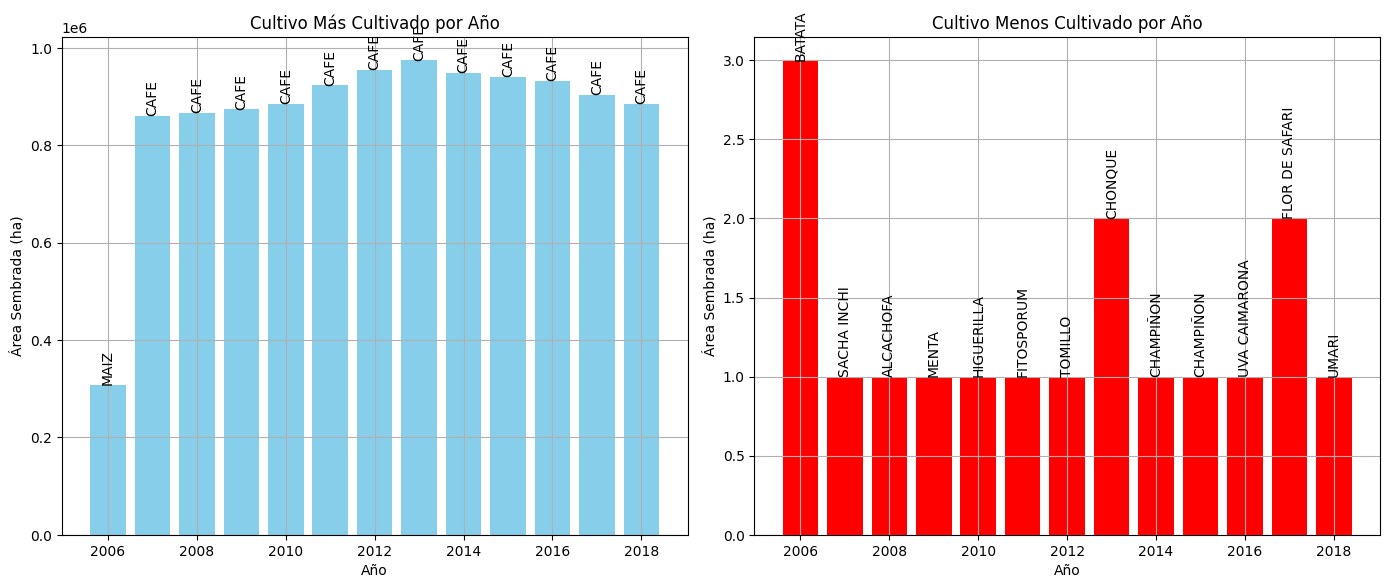

In [55]:
# Crear dos gráficos separados
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para el cultivo más cultivado
axs[0].bar(result_df['ANIO'], result_df['AREA_SEMBRADA_HA_MAS'], color='skyblue')
axs[0].set_title('Cultivo Más Cultivado por Año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Área Sembrada (ha)')
axs[0].grid(True)

# Añadir etiquetas de producto
for i, txt in enumerate(result_df['CULTIVO_MAS']):
    axs[0].text(result_df['ANIO'][i], result_df['AREA_SEMBRADA_HA_MAS'][i], txt, ha='center', va='bottom', rotation=90)

# Gráfico para el cultivo menos cultivado
axs[1].bar(result_df['ANIO'], result_df['AREA_SEMBRADA_HA_MENOS'], color='red')
axs[1].set_title('Cultivo Menos Cultivado por Año')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Área Sembrada (ha)')
axs[1].grid(True)

# Añadir etiquetas de producto
for i, txt in enumerate(result_df['CULTIVO_MENOS']):
    axs[1].text(result_df['ANIO'][i], result_df['AREA_SEMBRADA_HA_MENOS'][i], txt, ha='center', va='bottom', rotation=90)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [29]:

# Agrupa por 'ciclo_cultivo' y 'cultivo', y calcula el promedio del rendimiento y la suma del área sembrada
rendimiento_area_por_cultivo_ciclo = df_agro_col.groupby(['ciclo_cultivo', 'cultivo']).agg({
    'rendimiento_ton_ha': 'mean',
    'area_sembrada_ha': 'sum'
}).reset_index()

# Inicializar lista para almacenar resultados
top5_yield_list = []

# Identificar los 5 cultivos con mayor rendimiento por ciclo_cultivo
for ciclo in rendimiento_area_por_cultivo_ciclo['ciclo_cultivo'].unique():
    ciclo_data = rendimiento_area_por_cultivo_ciclo[rendimiento_area_por_cultivo_ciclo['ciclo_cultivo'] == ciclo]
    top5_yield = ciclo_data.nlargest(5, 'rendimiento_ton_ha')
    top5_yield_list.append(top5_yield)

# Convertir lista a DataFrame
top5_yield_df = pd.concat(top5_yield_list).reset_index(drop=True)

# Renombrar columnas para claridad
top5_yield_df.columns = ['CICLO_CULTIVO', 'CULTIVO', 'RENDIMIENTO_TON_HA', 'AREA_SEMBRADA_HA']

# Mostrar el resultado
print("Top 5 cultivos con mayor rendimiento por ciclo_cultivo:")
top5_yield_df


Top 5 cultivos con mayor rendimiento por ciclo_cultivo:


,CICLO_CULTIVO,CULTIVO,RENDIMIENTO_TON_HA,AREA_SEMBRADA_HA
0,ANUAL,YACON,19.007407,284
1,ANUAL,JENGIBRE,14.000000,19
2,ANUAL,YUCA,10.465773,2605175
3,ANUAL,RUDA,9.800000,57
4,ANUAL,AJI,9.438919,708
5,PERMANENTE,CAÑA AZUCARERA,117.301389,2811949
6,PERMANENTE,CHAMPIÑON,60.000000,8
7,PERMANENTE,PIÑA,28.989849,252191
8,PERMANENTE,SABILA,28.063974,3819
9,PERMANENTE,CHAMBA,27.537500,119


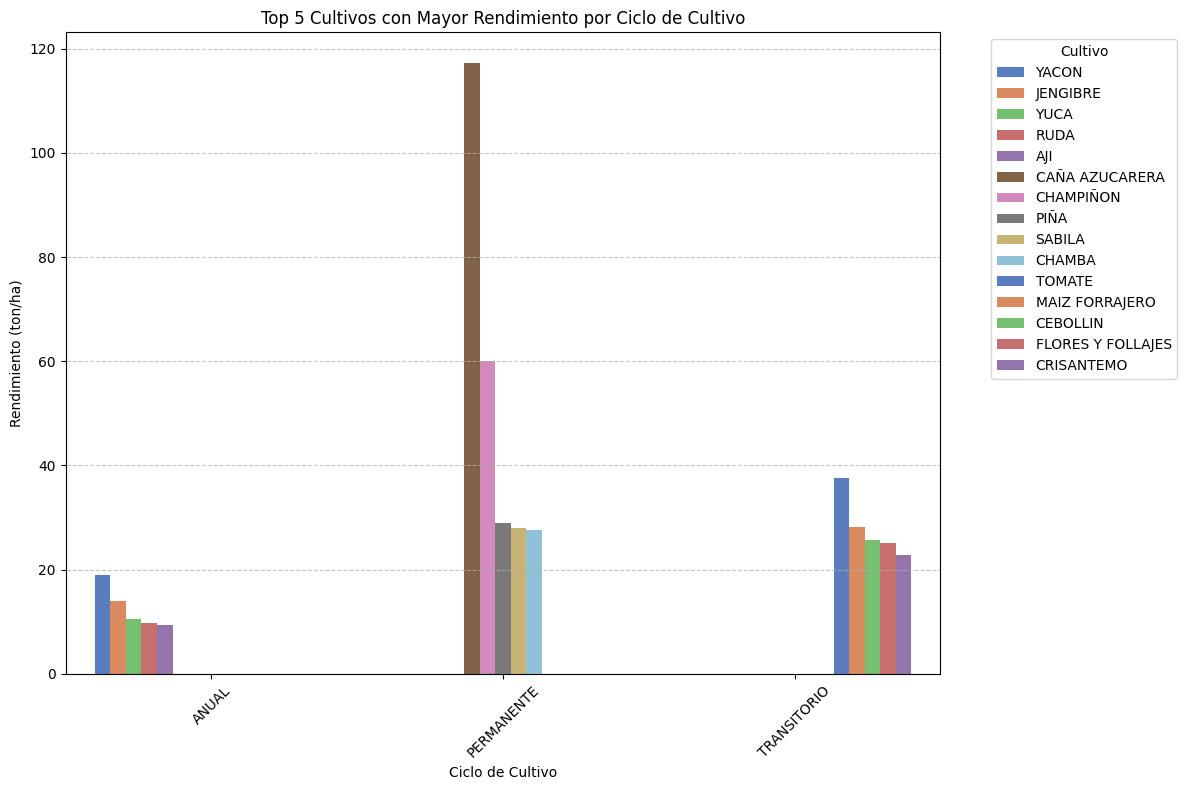

In [30]:
# Ordenar el DataFrame por ciclo de cultivo y rendimiento descendente
top5_yield_df_sorted = top5_yield_df.sort_values(by=['CICLO_CULTIVO', 'RENDIMIENTO_TON_HA'], ascending=[True, False])

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(data=top5_yield_df_sorted, x='CICLO_CULTIVO', y='RENDIMIENTO_TON_HA', hue='CULTIVO', palette='muted', dodge=True)
plt.title('Top 5 Cultivos con Mayor Rendimiento por Ciclo de Cultivo')
plt.xlabel('Ciclo de Cultivo')
plt.ylabel('Rendimiento (ton/ha)')
plt.xticks(rotation=45)
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [31]:

# Filtrar el DataFrame para obtener las filas del departamento del Cauca
cauca_df = df_agro_col[df_agro_col['depto'].str.strip().str.lower() == 'cauca']

# Filtrar el DataFrame para obtener solo las filas del grupo de cultivo "Frutales"
frutales_cauca_df = cauca_df[cauca_df['grupo_cultivo'].str.strip().str.lower() == 'frutales']

# Agrupar por municipio y sumar la producción en toneladas
produccion_por_municipio = frutales_cauca_df.groupby('nombre_mpio')['produccion_ton'].sum().reset_index()

# Renombrar las columnas para claridad
produccion_por_municipio.columns = ['MUNICIPIO', 'PRODUCCION_TON']

# Mostrar el resultado
print("Producción en toneladas de cada municipio del departamento del Cauca para el grupo de cultivo 'Frutales':")
produccion_por_municipio


Producción en toneladas de cada municipio del departamento del Cauca para el grupo de cultivo 'Frutales':


,MUNICIPIO,PRODUCCION_TON
0,ALMAGUER,1731
1,ARGELIA,5303
2,BALBOA,18211
3,BOLIVAR,3557
4,BUENOS AIRES,10513
5,CAJIBIO,3396
6,CALDONO,7366
7,CALOTO,56316
8,CORINTO,7159
9,EL TAMBO,158523


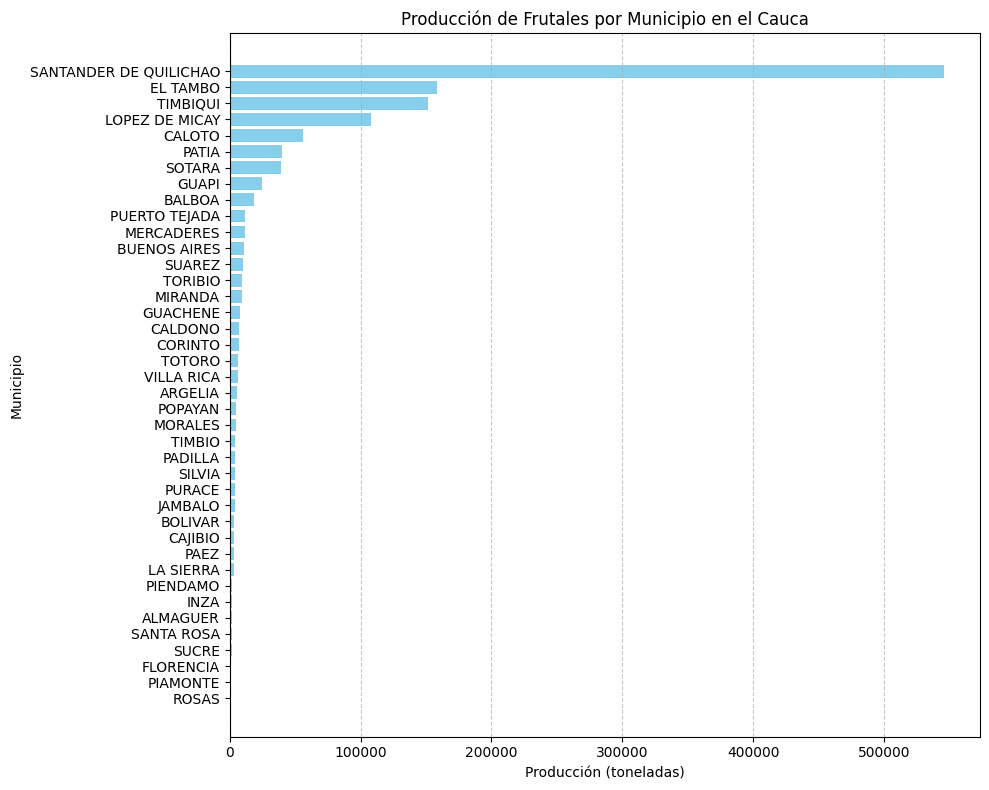

In [56]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por producción en toneladas de manera descendente
produccion_por_municipio_sorted = produccion_por_municipio.sort_values(by='PRODUCCION_TON', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(produccion_por_municipio_sorted['MUNICIPIO'], produccion_por_municipio_sorted['PRODUCCION_TON'], color='skyblue')
plt.title('Producción de Frutales por Municipio en el Cauca')
plt.xlabel('Producción (toneladas)')
plt.ylabel('Municipio')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar los municipios de arriba hacia abajo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 7. Representar en un mapa interactivo los 5 municipios más productivos por cada departamento.

In [33]:

# Agrupar por departamento, municipio, código de departamento y código de municipio, sumando la producción en toneladas
produccion_por_municipio_depto = df_agro_col.groupby(['cod_dep', 'depto', 'cod_mpio', 'nombre_mpio'])['produccion_ton'].sum().reset_index()

# Inicializar lista para almacenar resultados
top5_municipios_list = []

# Identificar los 5 municipios más productivos por departamento
for cod_dep in produccion_por_municipio_depto['cod_dep'].unique():
    depto_data = produccion_por_municipio_depto[produccion_por_municipio_depto['cod_dep'] == cod_dep]
    top5_municipios = depto_data.nlargest(5, 'produccion_ton')
    top5_municipios_list.append(top5_municipios)

# Concatenar los resultados en un solo DataFrame
top5_municipios_df = pd.concat(top5_municipios_list).reset_index(drop=True)

# Mostrar el resultado
print("Los 5 municipios más productivos para cada departamento:")
#top5_municipios_df

Los 5 municipios más productivos para cada departamento:


In [34]:

# Concatenar las columnas depto, nombre_mpio en una nueva columna 'CONCAT'
top5_municipios_df['CONCAT'] = top5_municipios_df['depto'] + '-' + top5_municipios_df['nombre_mpio'].astype(str)

# Selecciona las columnas relevantes, incluyendo la nueva columna concatenada
top5_concatenado = top5_municipios_df[['CONCAT', 'cod_dep', 'depto', 'cod_mpio',	'nombre_mpio', 'produccion_ton']]

# Muestra el resultado
top5_concatenado

,CONCAT,cod_dep,depto,cod_mpio,nombre_mpio,produccion_ton
0,ANTIOQUIA-TURBO,5,ANTIOQUIA,5837,TURBO,6841346
1,ANTIOQUIA-APARTADO,5,ANTIOQUIA,5045,APARTADO,4636532
2,ANTIOQUIA-CAREPA,5,ANTIOQUIA,5147,CAREPA,4478744
3,ANTIOQUIA-CHIGORODO,5,ANTIOQUIA,5172,CHIGORODO,1987364
4,ANTIOQUIA-SANTUARIO,5,ANTIOQUIA,5697,SANTUARIO,946527
...,...,...,...,...,...,...
148,VAUPES-TARAIRA,97,VAUPES,97666,TARAIRA,21458
149,VICHADA-CUMARIBO,99,VICHADA,99773,CUMARIBO,601844
150,VICHADA-PUERTO CARREÑO,99,VICHADA,99001,PUERTO CARREÑO,54770
151,VICHADA-LA PRIMAVERA,99,VICHADA,99524,LA PRIMAVERA,50729


In [35]:

# Realizamos las sustituciones usando el método replace
replacements = {
    'DEPTO': {
        'SAN ANDRES PROVIDENCIA Y SANTA CATALINA': 'SAN ANDRES Y PROVIDENCIA',
        'choco': 'CHOCO',
        'Choco': 'CHOCO'
    },
    'MPIO_CNMBR': {
        'MO?ITOS': 'MOÑITOS',
        'SAN CARLOS GUAROA': 'SAN CARLOS DE GUAROA',
        'LEGUIZAMO': 'PUERTO LEGUIZAMO',
        'PROVIDENCIA Y SANTA CATALINA' : 'PROVIDENCIA'
    }
    }

mpio.replace(replacements, inplace=True)

# Mostramos el resultado para verificar los cambios
#mpio

In [36]:
# Concatenar las columnas DEPTO, MPIO_CCDGO en una nueva columna 'CONCAT'
mpio['CONCAT'] = mpio['DEPTO'] + '-' + mpio['MPIO_CNMBR'].astype(str)

# Selecciona las columnas relevantes, incluyendo la nueva columna concatenada
mpio_concatenado = mpio[['CONCAT', 'DPTO_CCDGO', 'DEPTO', 'MPIO_CCDGO',	'MPIO_CNMBR', 'geometry']]

# Muestra el resultado
mpio_concatenado

,CONCAT,DPTO_CCDGO,DEPTO,MPIO_CCDGO,MPIO_CNMBR,geometry
0,CAQUETA-FLORENCIA,18,CAQUETA,001,FLORENCIA,"POLYGON ((-75.42074 2.19413, -75.42628 2.19504..."
1,CAQUETA-ALBANIA,18,CAQUETA,029,ALBANIA,"POLYGON ((-75.89506 1.36570, -75.89546 1.36587..."
2,CAQUETA-BELEN DE LOS ANDAQUIES,18,CAQUETA,094,BELEN DE LOS ANDAQUIES,"POLYGON ((-75.78705 1.74982, -75.78603 1.75216..."
3,CAQUETA-EL DONCELLO,18,CAQUETA,247,EL DONCELLO,"POLYGON ((-75.36167 2.32143, -75.36259 2.32241..."
4,CAQUETA-EL PAUJIL,18,CAQUETA,256,EL PAUJIL,"POLYGON ((-75.36638 2.20952, -75.38628 2.31458..."
...,...,...,...,...,...,...
1113,CUNDINAMARCA-FUSAGASUGA,25,CUNDINAMARCA,290,FUSAGASUGA,"POLYGON ((-74.29700 4.42407, -74.29822 4.42617..."
1114,CUNDINAMARCA-SAN JUAN DE RIO SECO,25,CUNDINAMARCA,662,SAN JUAN DE RIO SECO,"POLYGON ((-74.72826 4.96905, -74.72845 4.96939..."
1115,TOLIMA-HONDA,73,TOLIMA,349,HONDA,"POLYGON ((-74.82173 5.31671, -74.82269 5.31812..."
1116,ANTIOQUIA-SABANETA,05,ANTIOQUIA,631,SABANETA,"POLYGON ((-75.60355 6.15510, -75.60372 6.15525..."


In [37]:

# Eliminar duplicados en la columna 'CONCAT'
top5_concatenado_unique = top5_concatenado.drop_duplicates(subset=['CONCAT'])
mpio_concatenado_unique = mpio_concatenado.drop_duplicates(subset=['CONCAT'])

# Realizamos un merge interno para encontrar las filas con valores idénticos en 'CONCAT'
identical_df = pd.merge(top5_concatenado_unique, mpio_concatenado_unique, on='CONCAT', how='inner')
columns_to_keep_top5 = ['depto', 'nombre_mpio', 'produccion_ton']  # Columnas de top5_concatenado
columns_to_keep_mpio = ['geometry']  # Columnas de mpio_concatenado

# Creamos el DataFrame resultante con las columnas seleccionadas
result_final = identical_df[columns_to_keep_top5 + columns_to_keep_mpio]

# Mostramos las columnas disponibles en el DataFrame resultante
result_final

,depto,nombre_mpio,produccion_ton,geometry
0,ANTIOQUIA,TURBO,6841346,"POLYGON ((-76.40525 8.47648, -76.40605 8.47660..."
1,ANTIOQUIA,APARTADO,4636532,"POLYGON ((-76.42487 8.07300, -76.53331 7.96367..."
2,ANTIOQUIA,CAREPA,4478744,"POLYGON ((-76.76941 7.87897, -76.77180 7.87977..."
3,ANTIOQUIA,CHIGORODO,1987364,"POLYGON ((-76.80956 7.77069, -76.80956 7.77096..."
4,ANTIOQUIA,SANTUARIO,946527,"POLYGON ((-75.24933 6.17184, -75.25044 6.17237..."
...,...,...,...,...
148,VAUPES,TARAIRA,21458,"POLYGON ((-70.05217 -0.14663, -70.05164 -0.145..."
149,VICHADA,CUMARIBO,601844,"POLYGON ((-68.47074 5.55047, -68.46983 5.55265..."
150,VICHADA,PUERTO CARREÑO,54770,"POLYGON ((-67.80972 6.32432, -67.81159 6.32407..."
151,VICHADA,LA PRIMAVERA,50729,"POLYGON ((-69.03359 6.21870, -69.04347 6.22157..."


Mapa Geolocalizacion

In [38]:
#instalando dash y folium, librerias necesarias para la creacion del mapa interactivo
!pip install dash dash-html-components dash-core-components dash-bootstrap-components folium
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 25.4 MB/s eta 0:00:00


In [39]:
import folium
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import geopandas as gpd

# DataFrame result_final en un GeoDataFrame
gdf = gpd.GeoDataFrame(result_final, geometry='geometry')

# Crear una instancia de Dash
app = dash.Dash(__name__)

# Define el diseño de tu aplicación Dash
app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='dropdown',
            options=[{'label': depto, 'value': depto} for depto in gdf['depto'].unique()],
            value=gdf['depto'].iloc[0]  # Selecciona el primer departamento por defecto
        ),
        html.Div(id='map-container'),
    ]),
])

# Define una función para actualizar el mapa en base al departamento seleccionado
@app.callback(
    Output('map-container', 'children'),
    [Input('dropdown', 'value')]
)
def update_map(selected_depto):
    try:
        # Filtra tu GeoDataFrame gdf por el departamento seleccionado
        filtered_gdf = gdf[gdf['depto'] == selected_depto]

        # Verifica si el DataFrame filtrado está vacío
        if filtered_gdf.empty:
            return html.P("No hay datos para el departamento seleccionado.")

        # Crea un mapa Folium con un fondo de OpenStreetMap
        m = folium.Map(location=[filtered_gdf['geometry'].centroid.y.mean(), filtered_gdf['geometry'].centroid.x.mean()], zoom_start=8, tiles='OpenStreetMap')

        # Agrega los datos del departamento seleccionado al mapa
        for idx, row in filtered_gdf.iterrows():
            if row['geometry'].geom_type == 'Polygon':
                folium.GeoJson(row['geometry'], name=row['nombre_mpio'], tooltip=f"{row['nombre_mpio']}").add_to(m)
                centroid = row['geometry'].centroid
                popup = folium.Popup(f"{row['nombre_mpio']} - {row['depto']} - Producción: {row['produccion_ton']} ton", max_width=300)
                folium.Marker([centroid.y, centroid.x], popup=popup, icon=folium.Icon(color='blue')).add_to(m)
            else:
                print(f"No se pudo agregar el municipio {row['nombre_mpio']}: tipo de geometría no compatible.")

        # Agregar control de capas al mapa
        folium.LayerControl().add_to(m)

        # Convierte el mapa Folium a HTML y devuélvelo para que se muestre en el contenedor
        return html.Iframe(srcDoc=m._repr_html_(), width='100%', height=600)
    except Exception as e:
        return html.P(f"Error: {str(e)}")

# Ejecuta la aplicación Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

#8.Regresion Lineal area sembrada y producion

---



En el análisis de datos agrícolas de Colombia, nos interesa examinar la relación entre dos variables: el área sembrada y la producción en toneladas obtenida. Dado que estamos interesados en establecer una relación lineal entre estas dos variables, utilizaremos la regresión lineal como método de modelado.

Para llevar a cabo este análisis, utilizaremos herramientas como pandas y scikit-learn en Python. La regresión lineal nos permitirá determinar la relación entre el área sembrada y la producción agrícola en Colombia.

In [40]:
# Filtrar los datos para los departamento mas productivo
import pandas as pd

# Filtrar el DataFrame para los departamento especificados
df1 = df_agro_col[df_agro_col['depto'] == 'VALLE DEL CAUCA']

In [57]:
# Filtrar el DataFrame df1
# Seleccionamos las filas donde el área sembrada es igual al área cosechada
# y la producción es diferente de cero
df1 = df1[(df1['area_sembrada_ha'] == df1['area_cosechada_ha']) & (df1['produccion_ton'] != 0)].reset_index(drop=True)


In [42]:
casos_menor_produccion = df1[df1['produccion_ton'] < df1['area_sembrada_ha']]

# Mostrar los casos identificados
casos_menor_produccion

,cod_dep,depto,cod_mpio,nombre_mpio,grupo_cultivo,subgrupo_cultivo,cultivo,desagregacion_regional,anio,periodo,area_sembrada_ha,area_cosechada_ha,produccion_ton,rendimiento_ton_ha,estado_fisico_produccion,ciclo_cultivo
558,76,VALLE DEL CAUCA,76318,GUACARI,FIBRAS,ALGODON,ALGODON,ALGODON,2011,2011A,58,58,41,0.70,SEMILLA,TRANSITORIO
616,76,VALLE DEL CAUCA,76364,JAMUNDI,FRUTALES,FRUTALES EXOTICOS,ARAZA,ARAZA,2014,2014,6,6,5,0.80,FRUTO FRESCO,PERMANENTE
617,76,VALLE DEL CAUCA,76364,JAMUNDI,FRUTALES,FRUTALES EXOTICOS,ARAZA,ARAZA,2015,2015,6,6,5,0.80,FRUTO FRESCO,PERMANENTE
618,76,VALLE DEL CAUCA,76364,JAMUNDI,FRUTALES,FRUTALES EXOTICOS,ARAZA,ARAZA,2016,2016,3,3,2,0.80,FRUTO FRESCO,PERMANENTE
619,76,VALLE DEL CAUCA,76364,JAMUNDI,FRUTALES,FRUTALES EXOTICOS,ARAZA,ARAZA,2017,2017,3,3,2,0.80,FRUTO FRESCO,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,76,VALLE DEL CAUCA,76828,TRUJILLO,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2014,2014B,32,32,28,0.88,GRANO SECO,TRANSITORIO
5351,76,VALLE DEL CAUCA,76275,FLORIDA,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2016,2016A,75,75,53,0.70,GRANO SECO,TRANSITORIO
5430,76,VALLE DEL CAUCA,76364,JAMUNDI,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2017,2017A,5,5,4,0.80,GRANO SECO,TRANSITORIO
7171,76,VALLE DEL CAUCA,76111,BUGA,"PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES",PLANTAS AROMATICAS,PLANTAS AROMATICAS,PLANTAS AROMATICAS,2013,2013A,2,2,1,0.50,HOJA FRESCA,TRANSITORIO


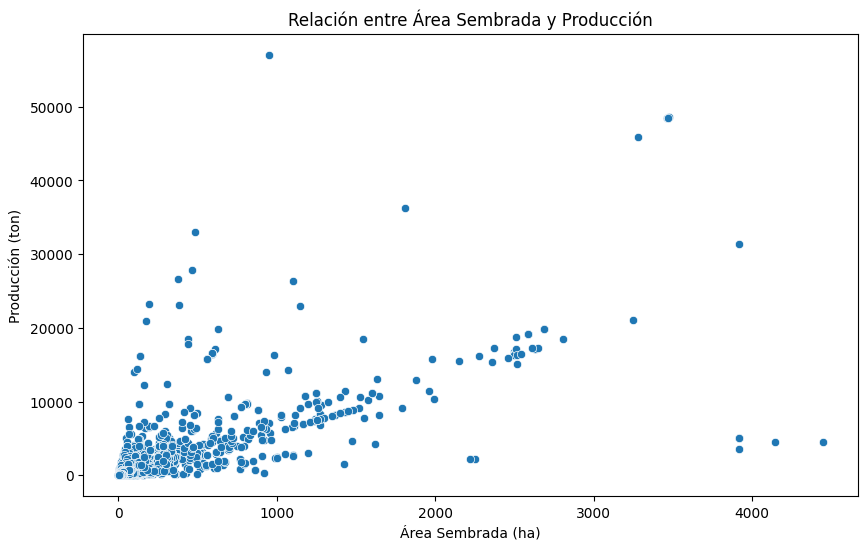

Linear Regression - Error cuadrático medio: 1631235.73, R²: 0.63, R² con validación cruzada: 0.58


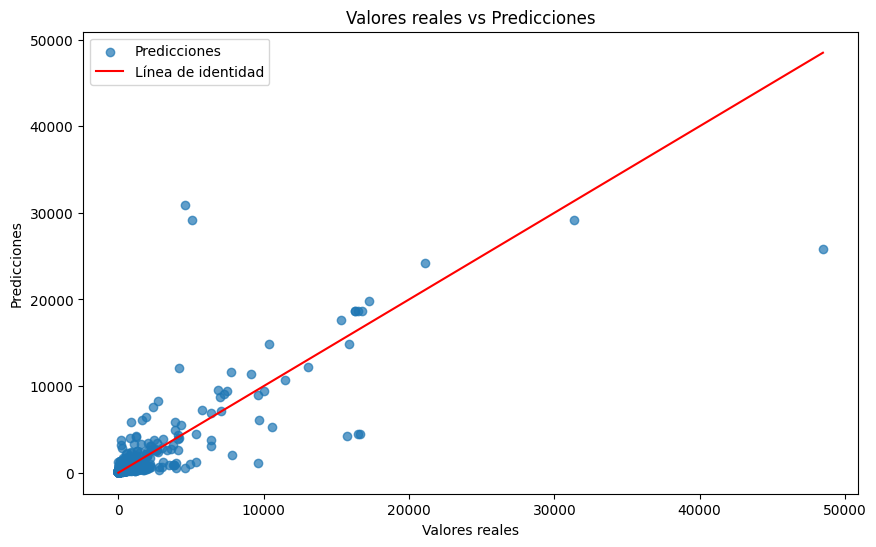

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# df1 = pd.read_csv('tu_archivo.csv') # Cargar datos si fuera necesario

# Asegúrate de que no haya valores nulos en las columnas que usarás
df1 = df1.dropna(subset=['area_sembrada_ha', 'produccion_ton'])

# Visualización de la relación entre area_sembrada_ha y produccion_ton
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_sembrada_ha', y='produccion_ton', data=df1)
plt.title('Relación entre Área Sembrada y Producción')
plt.xlabel('Área Sembrada (ha)')
plt.ylabel('Producción (ton)')
plt.show()

# Dividir los datos en características (X) y etiquetas (y)
X = df1[['area_sembrada_ha']]
y = df1['produccion_ton']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Validación cruzada
scores = cross_val_score(linear_model, X_train, y_train, cv=10, scoring='r2')
r2_cv = scores.mean()

print(f"Linear Regression - Error cuadrático medio: {mse:.2f}, R²: {r2:.2f}, R² con validación cruzada: {r2_cv:.2f}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicciones', alpha=0.7)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Línea de identidad')
plt.legend()
plt.show()




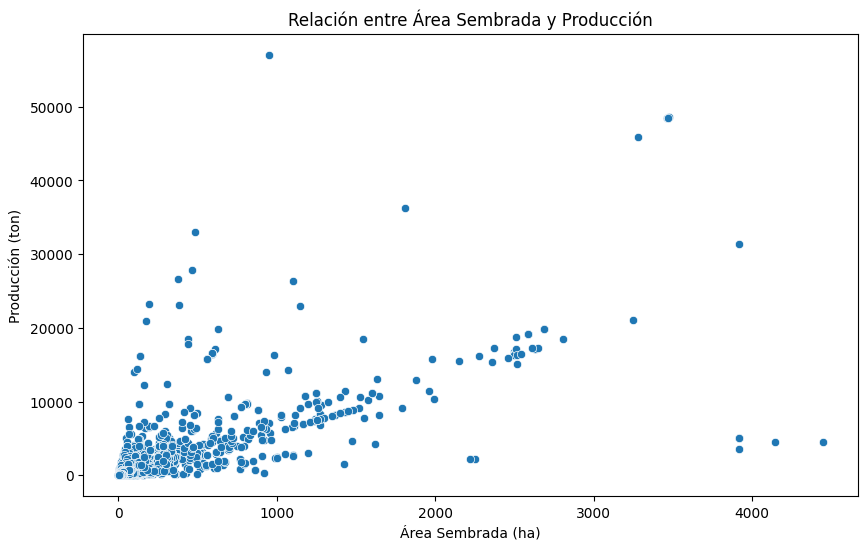

Linear Regression - Error cuadrático medio: 1631235.73, R²: 0.63, R² con validación cruzada: 0.58
Polynomial Regression (grado 2) - Error cuadrático medio: 1494200.02, R²: 0.67, R² con validación cruzada: 0.58


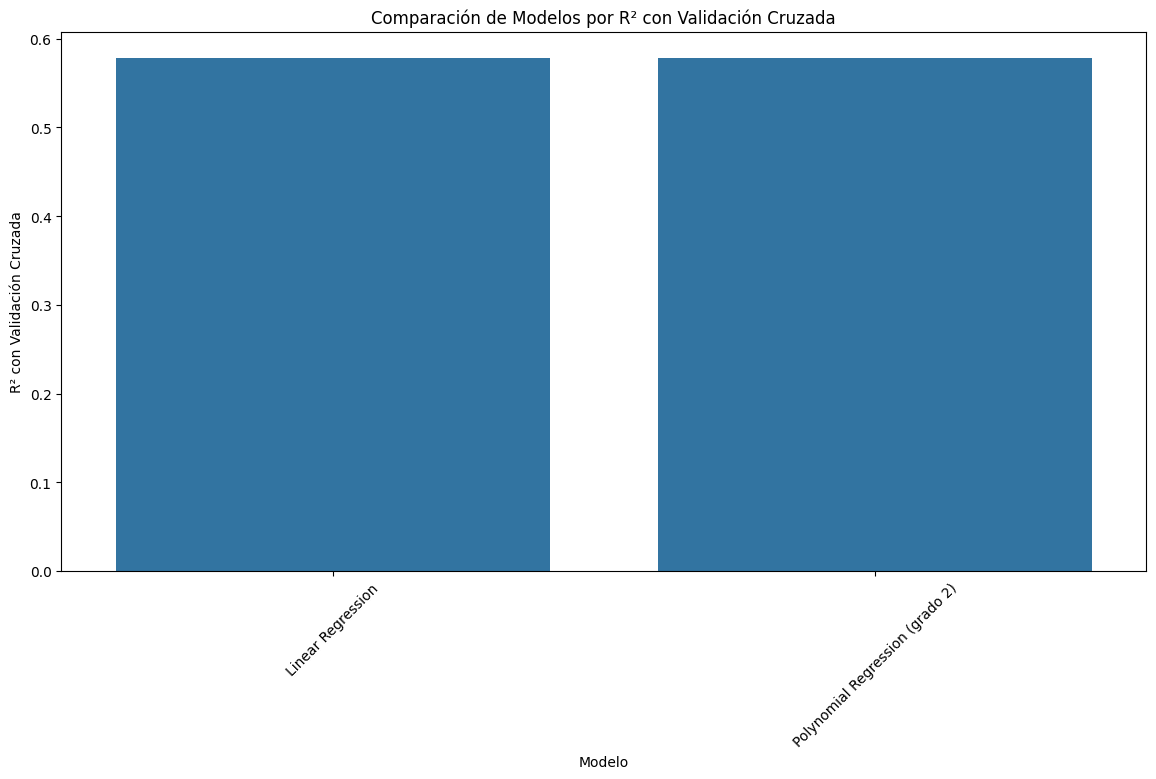

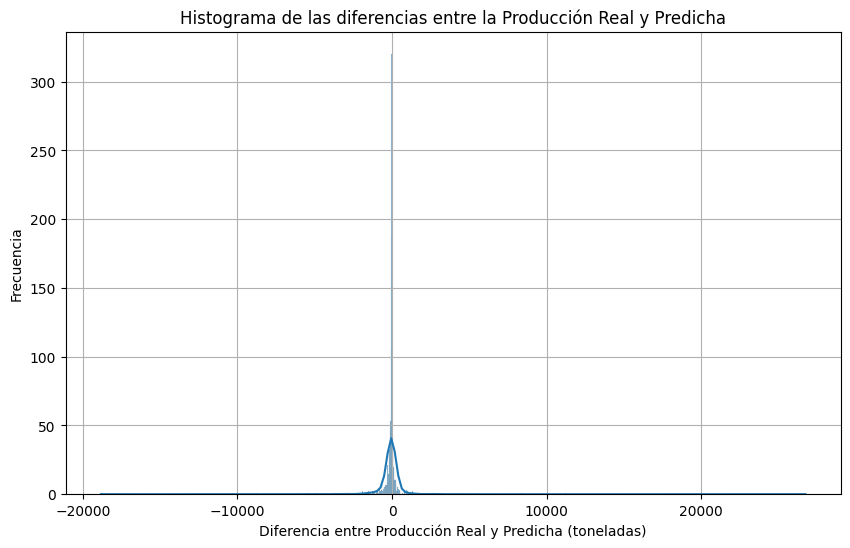

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# df1 = pd.read_csv('tu_archivo.csv') # Cargar datos si fuera necesario

# Asegúrate de que no haya valores nulos en las columnas que usarás
df1 = df1.dropna(subset=['area_sembrada_ha', 'produccion_ton'])

# Visualización de la relación entre area_sembrada_ha y produccion_ton
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_sembrada_ha', y='produccion_ton', data=df1)
plt.title('Relación entre Área Sembrada y Producción')
plt.xlabel('Área Sembrada (ha)')
plt.ylabel('Producción (ton)')
plt.show()

# Dividir los datos en características (X) y etiquetas (y)
X = df1[['area_sembrada_ha']]
y = df1['produccion_ton']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (grado 2)': make_pipeline(PolynomialFeatures(2), LinearRegression())
}

results = []

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Validación cruzada
    scores = cross_val_score(linear_model, X_train, y_train, cv=10, scoring='r2')

    r2_cv = scores.mean()

    results.append((name, mse, r2, r2_cv))

    print(f"{name} - Error cuadrático medio: {mse:.2f}, R²: {r2:.2f}, R² con validación cruzada: {r2_cv:.2f}")

# Visualización de resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'R2_CV'])

plt.figure(figsize=(14, 7))
sns.barplot(x='Modelo', y='R2_CV', data=results_df)
plt.title('Comparación de Modelos por R² con Validación Cruzada')
plt.ylabel('R² con Validación Cruzada')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

# Histograma de las diferencias para el mejor modelo
best_model = models['Polynomial Regression (grado 2)']
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

diferencias = y_test.values.flatten() - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(diferencias, kde=True)
plt.xlabel('Diferencia entre Producción Real y Predicha (toneladas)')
plt.ylabel('Frecuencia')
plt.title("Histograma de las diferencias entre la Producción Real y Predicha")
plt.grid(True)
plt.show()


In [68]:
print("Dimensiones de y_test:", y_test.shape)
print("Dimensiones de y_pred:", y_pred.shape)


Dimensiones de y_test: (1858,)
Dimensiones de y_pred: (1858,)


In [69]:
# Calcula la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcula el error medio absoluto (MAE)
mae = np.mean(np.abs(y_test - y_pred))

print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Polynomial Regression (grado 2) - RMSE: 1277.20, MAE: 339.26



Al comparar los resultados de los dos modelos de regresión, se pueden observar algunas diferencias significativas:

Error Cuadrático Medio (MSE):

Para la regresión lineal, el MSE es de 1631235.73, mientras que para la regresión polinomial de grado 2, el MSE es ligeramente menor, con un valor de 1494200.02. Esto indica que el modelo de regresión polinomial tiene un mejor ajuste a los datos en términos de la distancia entre las predicciones y los valores reales.
Coeficiente de Determinación (𝑅2):

El 𝑅2 para la regresión lineal es de 0.63, lo que significa que aproximadamente el 63% de la variabilidad de la producción agrícola puede ser explicada por el modelo de regresión lineal.
Para la regresión polinomial de grado 2, el 𝑅2 es ligeramente mayor, con un valor de 0.67, lo que indica que este modelo explica aproximadamente el 67% de la variabilidad en la producción agrícola.
Validación Cruzada (
𝑅2con CV):

Ambos modelos muestran un 𝑅2 con validación cruzada similar, con un valor de aproximadamente 0.58. Esto sugiere que ambos modelos tienen una capacidad similar para generalizar a datos no vistos.
En general, estos resultados indican que el modelo de regresión polinomial de grado 2 tiene un mejor desempeño que el modelo de regresión lineal en términos de ajuste a los datos y explicación de la variabilidad en la producción agrícola. Sin embargo, la diferencia en el 𝑅2 y el MSE entre los dos modelos no es muy grande, lo que sugiere que ambos modelos podrían ser adecuados dependiendo de los requisitos específicos del problema y la interpretación de los resultados.

#9. Clasificacion por  grupo de cultivo.

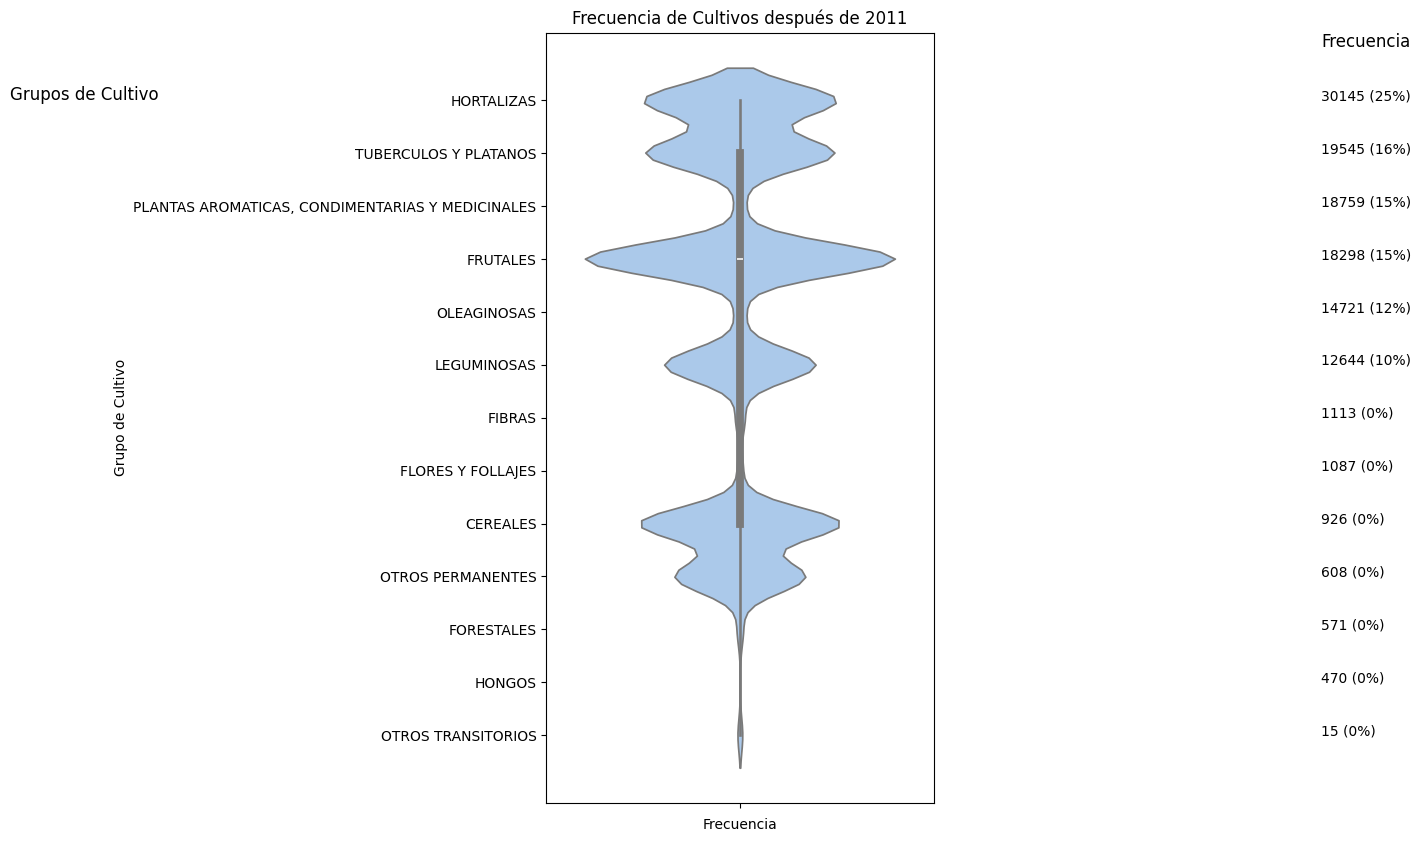

In [99]:
import seaborn as sns

# Filtrar los datos para los años posteriores a 2011
countss = df_agro_col[df_agro_col['anio'] > 2011]

# Contar la frecuencia de los grupos de cultivo
counts = countss["grupo_cultivo"].value_counts()

# Crear un diagrama de violín
plt.figure(figsize=(5, 10))
sns.violinplot(y=countss["grupo_cultivo"], palette="pastel")

# Añadir las etiquetas y el porcentaje en el diagrama de violín
plt.xlabel('Frecuencia')
plt.ylabel('Grupo de Cultivo')
plt.title('Frecuencia de Cultivos después de 2011')

# Añadir etiquetas y porcentaje en el gráfico
plt.text(-1.5, 0, "Grupos de Cultivo", fontsize=12, ha='right')
plt.text(1.5, -1, "Frecuencia",fontsize=12, ha='left')

# Añadir porcentaje de cada grupo de cultivo
for i, count in enumerate(counts):
    plt.text(1.5, i, f'{counts[i]} ({int(counts[i]/sum(counts)*100)}%)', fontsize=10, ha='left')

plt.show()


In [46]:
#Eliminar grupos de cultivo con porcenteje cero
gc_eliminar = ["HONGOS", "FORESTALES", "SFLORES Y FOLLAJES", "OLEAGINOSAS", "FIBRAS", "PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES", "OTROS TRANSITORIOS", "FLORES Y FOLLAJES"]
df2 = countss.copy()
for gc_cultivo in gc_eliminar:
    df2 = df2.drop(countss[countss["grupo_cultivo"] == gc_cultivo].index)

df2["grupo_cultivo"].unique()

array(['HORTALIZAS', 'TUBERCULOS Y PLATANOS', 'FRUTALES', 'LEGUMINOSAS',
       'CEREALES', 'OTROS PERMANENTES'], dtype=object)

In [47]:
knn_clf = KNeighborsClassifier()

In [48]:
# reemplazar los nombres de las categorías por números para el clasificador
df3 = df2.copy()
df3["grupo_cultivo"] = df3["grupo_cultivo"].replace({"HORTALIZAS": 0, "TUBERCULOS Y PLATANOS": 1, "FRUTALES": 2, "LEGUMINOSAS": 3, "CEREALES": 4, "OTROS PERMANENTES": 5})
df3.head()


,cod_dep,depto,cod_mpio,nombre_mpio,grupo_cultivo,subgrupo_cultivo,cultivo,desagregacion_regional,anio,periodo,area_sembrada_ha,area_cosechada_ha,produccion_ton,rendimiento_ton_ha,estado_fisico_produccion,ciclo_cultivo
67,15,BOYACA,15377,LABRANZAGRANDE,0,ACELGA,ACELGA,ACELGA,2012,2012A,2,1,1,1.0,FRUTO FRESCO,TRANSITORIO
68,19,CAUCA,19807,TIMBIO,0,ACELGA,ACELGA,ACELGA,2012,2012A,14,13,286,22.0,FRUTO FRESCO,TRANSITORIO
69,25,CUNDINAMARCA,25754,SOACHA,0,ACELGA,ACELGA,ACELGA,2012,2012A,9,8,96,12.0,FRUTO FRESCO,TRANSITORIO
70,25,CUNDINAMARCA,25214,COTA,0,ACELGA,ACELGA,ACELGA,2012,2012A,3,2,50,20.0,FRUTO FRESCO,TRANSITORIO
71,25,CUNDINAMARCA,25799,TENJO,0,ACELGA,ACELGA,ACELGA,2012,2012A,1,1,24,20.0,FRUTO FRESCO,TRANSITORIO


In [49]:
y = df3["grupo_cultivo"]
X = df3.drop("grupo_cultivo", axis=1)
print(f"tam X: {X.shape}")
print(f"tam y: {y.shape}")

tam X: (114112, 15)
tam y: (114112,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(f"tam X: {X_train.shape}")
print(f"tam y: {y_train.shape}")
print(f"tam X_test: {X_test.shape}")
print(f"tam y_test: {y_test.shape}")

tam X: (68467, 15)
tam y: (68467,)
tam X_test: (45645, 15)
tam y_test: (45645,)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


# Dividir el DataFrame en características (X) y etiqueta (y)
X = df3.drop('grupo_cultivo', axis=1)  # Reemplaza 'label_column' con el nombre de tu columna de etiquetas
y = df3['grupo_cultivo']

# Realizar One-Hot Encoding en las características categóricas
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear una instancia del clasificador KNN
knn_clf = KNeighborsClassifier()

# Entrenar el modelo
knn_clf.fit(X_train, y_train)

# Ahora puedes evaluar el modelo o hacer predicciones
# predicciones = knn_clf.predict(X_test)


KNeighborsClassifier()

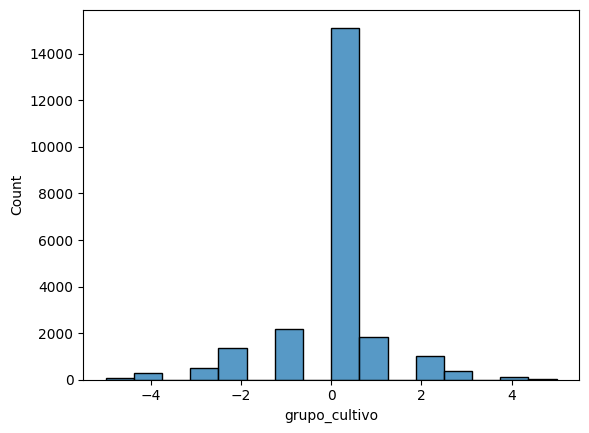

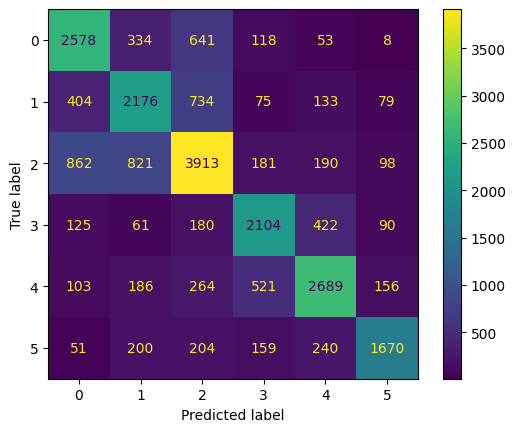

In [52]:
#Evaluando el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predicciones = knn_clf.predict(X_test)
diferencias = predicciones - y_test
sns.histplot(diferencias)
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      3732
           1       0.58      0.60      0.59      3601
           2       0.66      0.65      0.65      6065
           3       0.67      0.71      0.69      2982
           4       0.72      0.69      0.70      3919
           5       0.79      0.66      0.72      2524

    accuracy                           0.66     22823
   macro avg       0.67      0.67      0.67     22823
weighted avg       0.67      0.66      0.66     22823



Se observa que el modelo de clasificación presenta un desempeño general sólido, con una precisión promedio del 67% en todas las clases. Esto indica que el modelo es capaz de predecir correctamente la clase correcta aproximadamente dos tercios del tiempo. Sin embargo, hay algunas variaciones en el desempeño entre las clases individuales, con algunas clases mostrando una precisión y recuperación más altas que otras.

Por ejemplo, las clases 0, 2, 3 y 4 tienen precisiones y recuperaciones superiores al 65%, lo que sugiere que el modelo es bastante bueno identificando estas clases correctamente. Sin embargo, las clases 1 y 5 tienen un desempeño ligeramente inferior, con precisiones y recuperaciones alrededor del 60-65%.

# 10. Bibliografía
Chatgpt:
* https://chatgpt.com/?oai-dm=1

Codigo de material compartido durante el bootcamp Análisis de Datos_Nivel Innovador:
* https://colab.research.google.com/drive/1HxZQir2TBiOJ8dqjYnO03f3fyhKV0OLW#scrollTo=O_-f8pQxDafs